In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

First, we will begin by importing our data into pandas dataframes

In [36]:
# Specify the path to your .xlsx file
file_path_senate = 'Model-Senate-Beta-1.1.xlsx'
file_path_house = 'Model-House-Beta-1.1.xlsx'

# Read the Excel file into a DataFrame
senate = pd.read_excel(file_path_senate, sheet_name='MODEL SENATE')
house = pd.read_excel(file_path_house, sheet_name='MODEL HOUSE')

First, I want to compare metrics for the CGS Official Performance and Lugar Bipartisan Index because CGS claims they use the LBI as their source data. CGS gives 0 points to the bottom 25% of the index which is shown here.

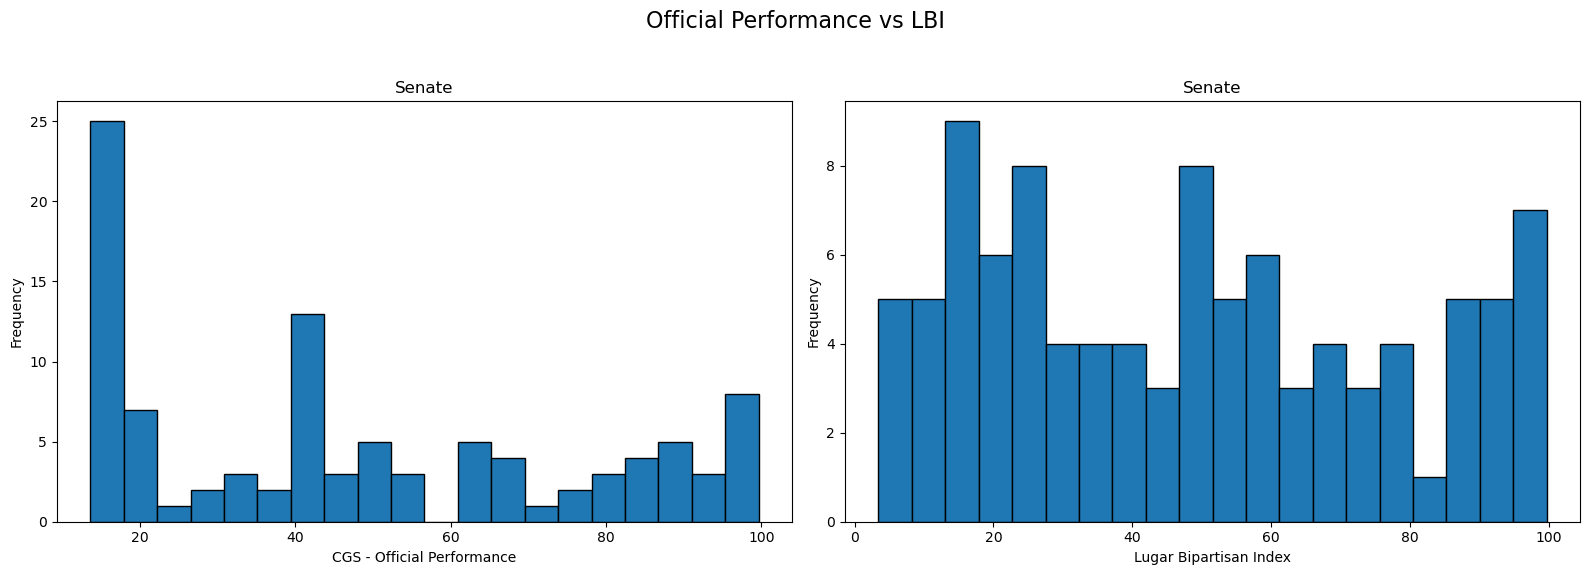

In [37]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Official Performance vs LBI', fontsize=16)

# First histogram
axs[0].hist(senate['normdisn_B'], bins=20, edgecolor='black')
axs[0].set_title('Senate')
axs[0].set_xlabel('CGS - Official Performance')
axs[0].set_ylabel('Frequency')

# Second histogram
axs[1].hist(senate['normdisn_D'], bins=20, edgecolor='black')
axs[1].set_title('Senate')
axs[1].set_xlabel('Lugar Bipartisan Index')
axs[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Here is a histogram of the house and senate Personal Actions / Commitments metric

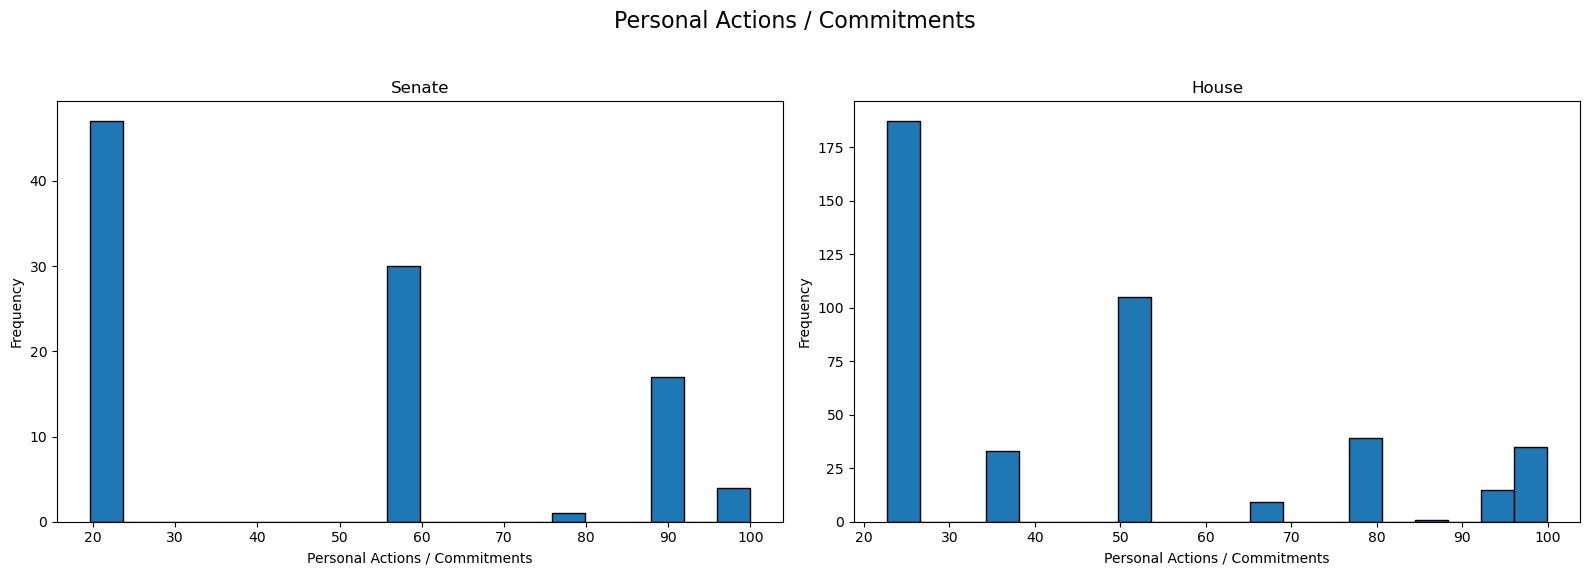

In [38]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Personal Actions / Commitments', fontsize=16)

# First histogram
axs[0].hist(senate['normdisn_K'], bins=20, edgecolor='black')
axs[0].set_title('Senate')
axs[0].set_xlabel('Personal Actions / Commitments')
axs[0].set_ylabel('Frequency')

# Second histogram
axs[1].hist(house['normdisn_K'], bins=20, edgecolor='black')
axs[1].set_title('House')
axs[1].set_xlabel('Personal Actions / Commitments')
axs[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

To demonstrate the binary nature of the Outstanding Common Grounder metric we will plot a histogram of it.

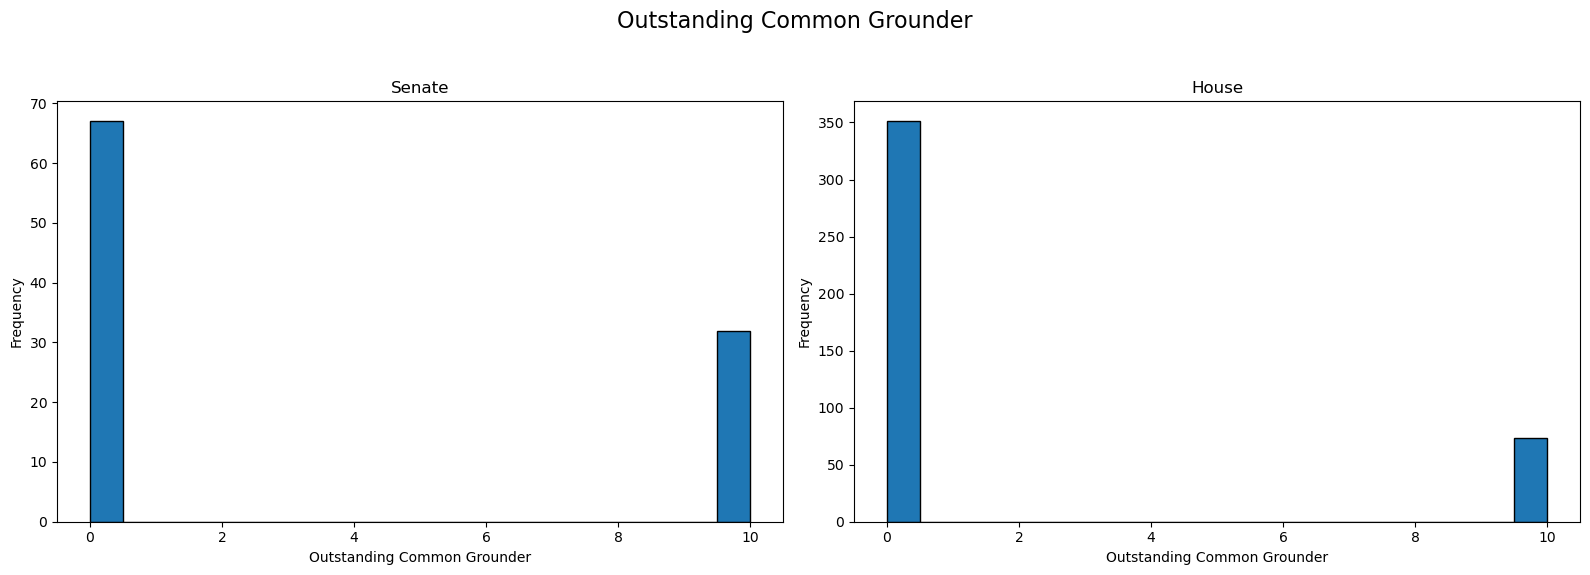

In [39]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Outstanding Common Grounder', fontsize=16)

# First histogram
axs[0].hist(senate['raw_G'], bins=20, edgecolor='black')
axs[0].set_title('Senate')
axs[0].set_xlabel('Outstanding Common Grounder')
axs[0].set_ylabel('Frequency')

# Second histogram
axs[1].hist(house['raw_G'], bins=20, edgecolor='black')
axs[1].set_title('House')
axs[1].set_xlabel('Outstanding Common Grounder')
axs[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We will do the same with the Personal Actions / Commitment metric. It is not binary but still very discrete and most legislators score 0 or 10.

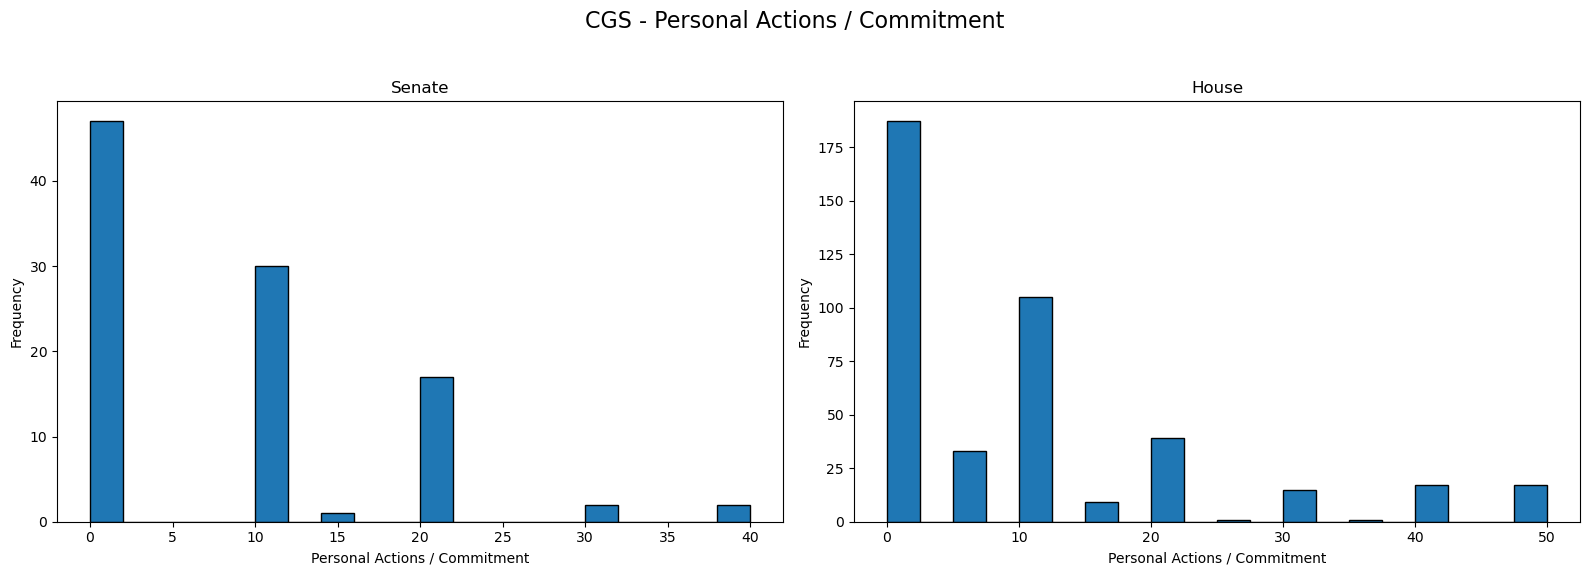

In [40]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('CGS - Personal Actions / Commitment', fontsize=16)

# First histogram
axs[0].hist(senate['raw_K'], bins=20, edgecolor='black')
axs[0].set_title('Senate')
axs[0].set_xlabel('Personal Actions / Commitment')
axs[0].set_ylabel('Frequency')

# Second histogram
axs[1].hist(house['raw_K'], bins=20, edgecolor='black')
axs[1].set_title('House')
axs[1].set_xlabel('Personal Actions / Commitment')
axs[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

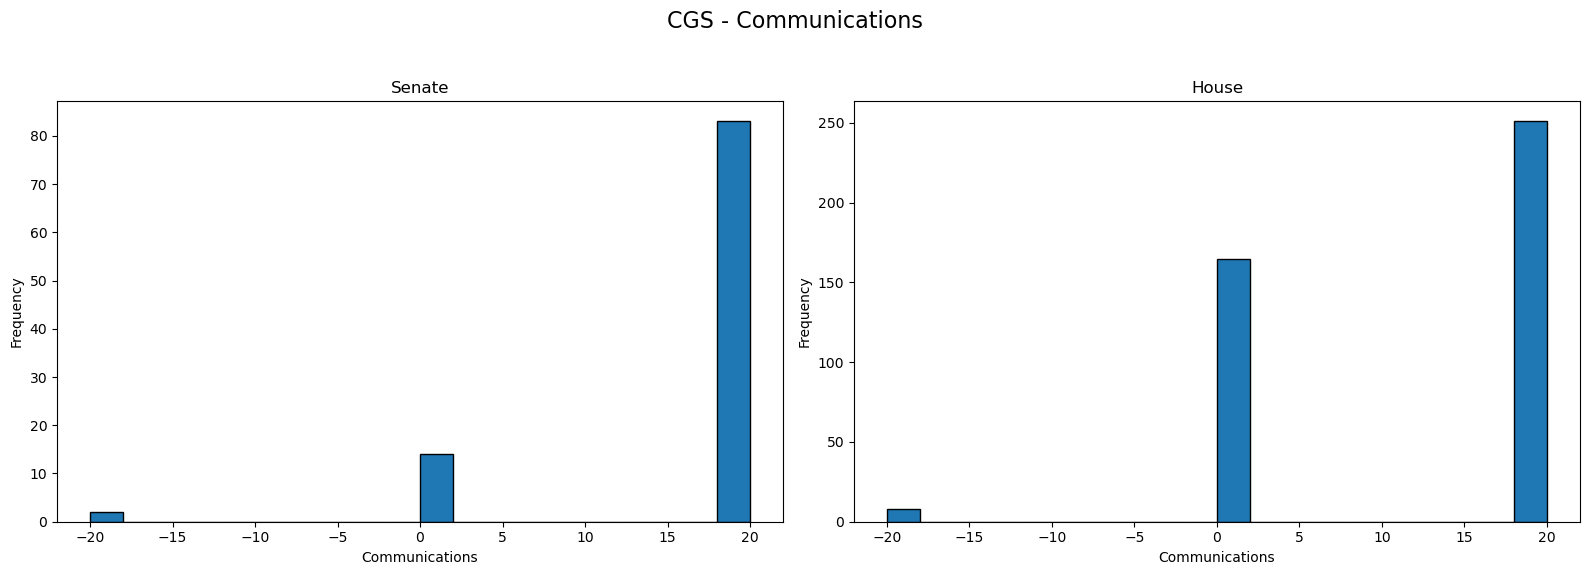

In [41]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('CGS - Communications', fontsize=16)

# First histogram
axs[0].hist(senate['raw_H'], bins=20, edgecolor='black')
axs[0].set_title('Senate')
axs[0].set_xlabel('Communications')
axs[0].set_ylabel('Frequency')

# Second histogram
axs[1].hist(house['raw_H'], bins=20, edgecolor='black')
axs[1].set_title('House')
axs[1].set_xlabel('Communications')
axs[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Here we can see the distribution of the positive and negative PRL scores for both Senate and House

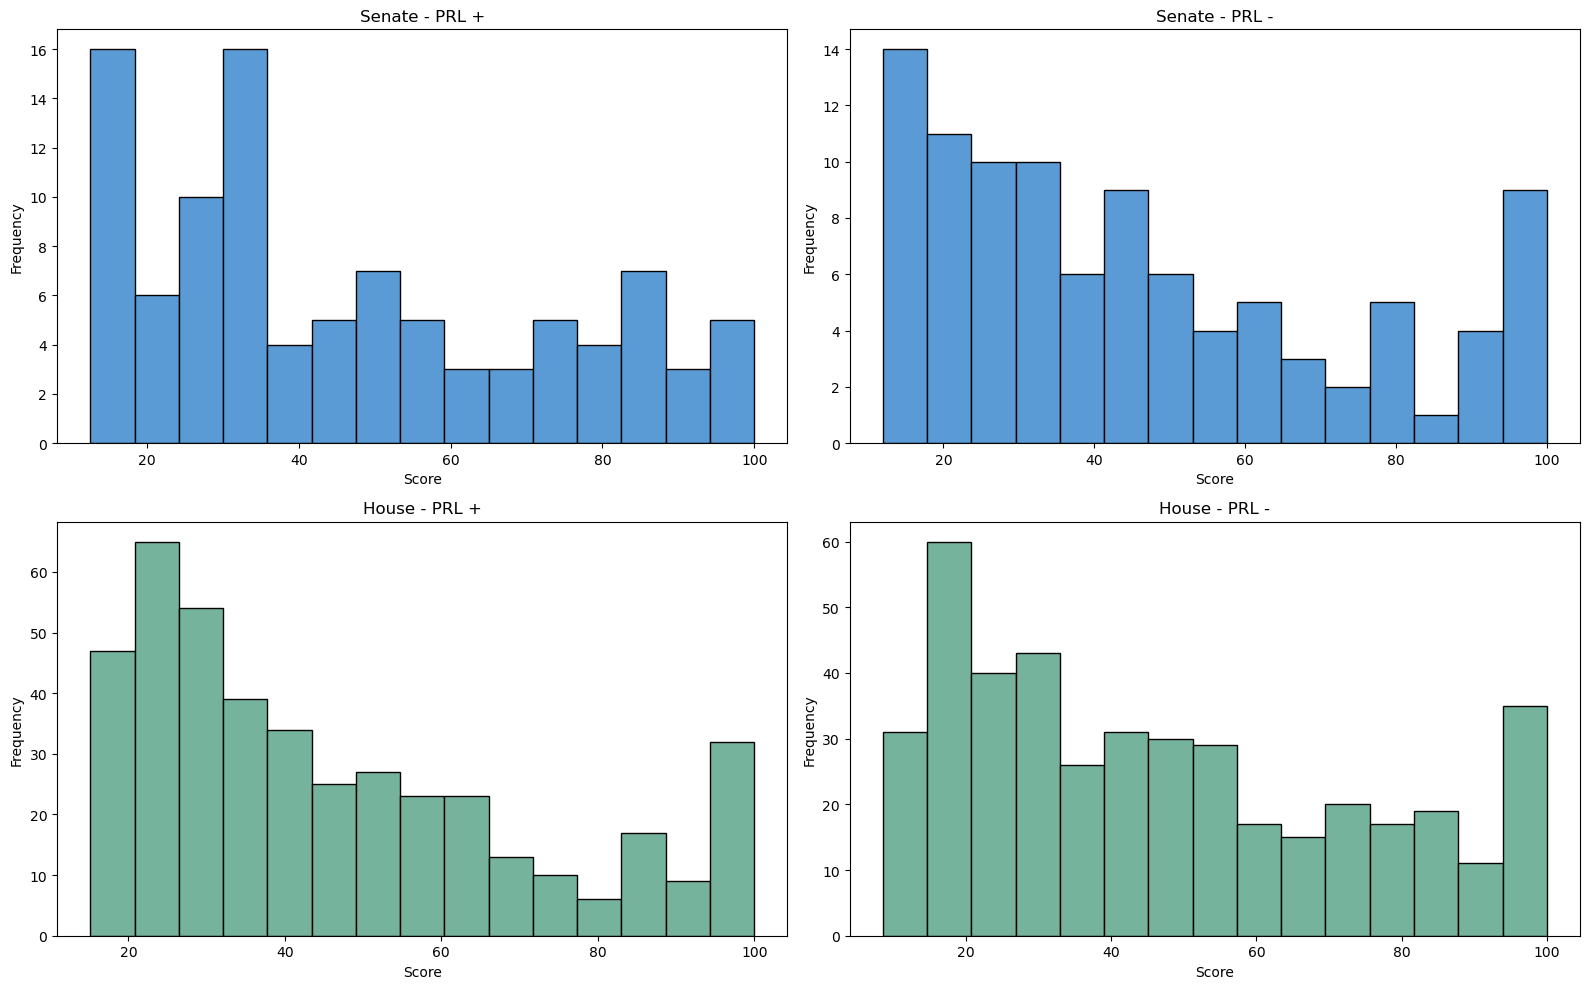

In [42]:
plt.figure(figsize=(16, 10))

# Histogram for Senate PRL +
plt.subplot(2, 2, 1)
plt.hist(senate['normdisn_F1'], bins=15, color="#5A9BD5", edgecolor='black')
plt.title('Senate - PRL +')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for Senate PRL - 
plt.subplot(2, 2, 2)
plt.hist(senate['normdisn_I1'], bins=15, color="#5A9BD5", edgecolor='black')
plt.title('Senate - PRL -')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for House PRL +
plt.subplot(2, 2, 3)
plt.hist(house['normdisn_F1'], bins=15, color="#76B39D", edgecolor='black')
plt.title('House - PRL +')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for House PRL -
plt.subplot(2, 2, 4)
plt.hist(house['normdisn_I1'], bins=15, color="#76B39D", edgecolor='black')
plt.title('House - PRL -')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Next, we will see what removing the CGS from the Bridge Calculation does to the scores. We begin by selecting the values used in the calculation into their own dataframe.

In [43]:
columns = ["normdisn_A", "normdisn_B", "normdisn_D", "normdisn_E", 
           "normdisn_F1", "normdisn_F2", "normdisn_G", "normdisn_H", 
           "normdisn_I1", "normdisn_I2", "normdisn_K", "normdisn_L", 
           "multiple_M", "multple_N", "multiple_O", 'match']

senate_scores = senate[columns]
house_scores = house[columns]

In [44]:
senate_scores

,normdisn_A,normdisn_B,normdisn_D,normdisn_E,normdisn_F1,normdisn_F2,normdisn_G,normdisn_H,normdisn_I1,normdisn_I2,normdisn_K,normdisn_L,multiple_M,multple_N,multiple_O,match
0,44.343490,87.859789,95.962724,99.909080,34.091952,36.088716,24.585377,66.126688,36.088716,17.400232,58.307440,16.205653,4.108759,0.522163,0.119301,1
1,48.127772,41.446967,44.967514,73.974513,47.341436,28.567392,24.585377,3.062724,28.567392,30.335462,58.307440,69.004900,4.108759,2.999531,3.408693,1
2,46.761683,41.446967,3.451973,49.724912,32.152065,62.947077,24.585377,3.062724,62.947077,85.054049,19.622155,99.619792,8.175499,3.736970,4.205624,1
3,10.777733,13.635722,8.607561,16.505704,28.267929,16.027471,24.585377,3.062724,16.027471,98.042811,19.622155,13.105486,8.175499,4.976688,4.684276,1
4,31.707892,85.133633,78.412125,85.770198,28.874030,40.758845,24.585377,66.126688,40.758845,16.508433,19.622155,90.818009,8.571698,2.307744,2.960723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,12.649514,13.635722,6.933263,49.398505,13.643324,16.161263,24.585377,66.126688,16.161263,99.986229,19.622155,34.918242,1.160378,4.256976,4.544487,1
95,70.019706,96.384238,98.516801,94.528104,97.661866,87.003292,92.501721,66.126688,87.003292,25.364349,99.034999,94.034019,9.791964,0.099307,0.015975,0
96,31.707892,93.888484,89.974791,98.738434,85.771230,49.925685,92.501721,66.126688,49.925685,34.913035,89.879669,73.842331,9.791964,0.960789,1.725016,1
97,26.800381,13.635722,28.996911,55.927867,16.230331,14.856010,92.501721,66.126688,14.856010,99.012357,19.622155,80.394829,9.941704,3.442305,3.866453,1


The below function takes in the previously created dataframe and returns the calculated score. Here we have removed the CGS metrics and given their weights either to the metric that is already capturing that data or to the metric in it's Bridge Score "Virtue"

Official Performance -> Lugar Bipartisan Index  
Outstanding Common Grounder -> PRL  
Communications -> PRL  
Personal Actions / Commitment -> DW-Nominate dim2  


In [45]:
def calculate_score(scores
):

    A, B, D, E, F1, F2, G, H, I1, I2, K, L, M, N, O, match = [scores[col] for col in columns]

    calculated_score = (
        round((A * 150), 2) +
        # round((B * 50), 2) +
        round((D * 150), 2) + 
        round((E * 100), 2) + 
        round((F1 * 150), 2) + 
        round((F2 * 100), 2) + 
        # round((G * 50), 2) +
        # round((H * 50), 2) + 
        round((I1 * 100), 2) + 
        round(((100 - I2) * 100), 2) + 
        # round((K * 50), 2) + 
        round((L * 100), 2)
)
    multiple = (100+((match*M)+N+O))/100
    return round(calculated_score/100 * multiple, 2)

After calculating we need to standardize the values to the 0-100 scale the Bridge Score uses. We will do that using the MinMaxScaler from SciKit

In [46]:
scaler = MinMaxScaler(feature_range=(0, 100))

# Scale the data
scaled_senate = scaler.fit_transform(calculate_score(senate_scores).values.reshape(-1, 1))
scaled_house = scaler.fit_transform(calculate_score(house_scores).values.reshape(-1, 1))

# Convert back to Pandas Series
no_CGS_senate = pd.Series(scaled_senate.flatten(), index=senate_scores.index)
no_CGS_house = pd.Series(scaled_house.flatten(), index=house_scores.index)

Next we need to assign Bridge Grades based on the existing system for letter grades. More than 1 standard deviation above the mean gets an A. Above the median but not an A gets a B. Below the median but not below a standard deviation from the mean gets a C. Below a standard deviation from the mean gets an F

In [47]:
def bridge_grading(series):
    # Calculate mean, standard deviation, and median
    mean = series.mean()
    std_dev = series.std()
    median = series.median()

    # Define the grading conditions
    def grade(value):
        if value > mean + std_dev:
            return "A"
        elif median < value <= mean + std_dev:
            return "B"
        elif mean - std_dev <= value <= median:
            return "C"
        else:
            return "F"

    # Apply the grade function to each value in the Series
    bridge_grades = series.apply(grade)
    
    # Define the category based on the Bridge Grade
    category = bridge_grades.apply(lambda x: "Bridger" if x in ["A", "B"] else "Divider")

    # Create and return the DataFrame with the original series and the new columns
    return pd.DataFrame({"Bridge Score": series, "Bridge Grade": bridge_grades, "Category": category})


In [48]:
new_grade_senate = bridge_grading(no_CGS_senate)
new_grade_house = bridge_grading(no_CGS_house)

Now that we have our new scores and grades we can compare them to the existing scores and grades. We will begin with a confusion matrix for both the senate and house. This shows pretty good agreement across both chambers with each having less than 10% of legislators changing grades

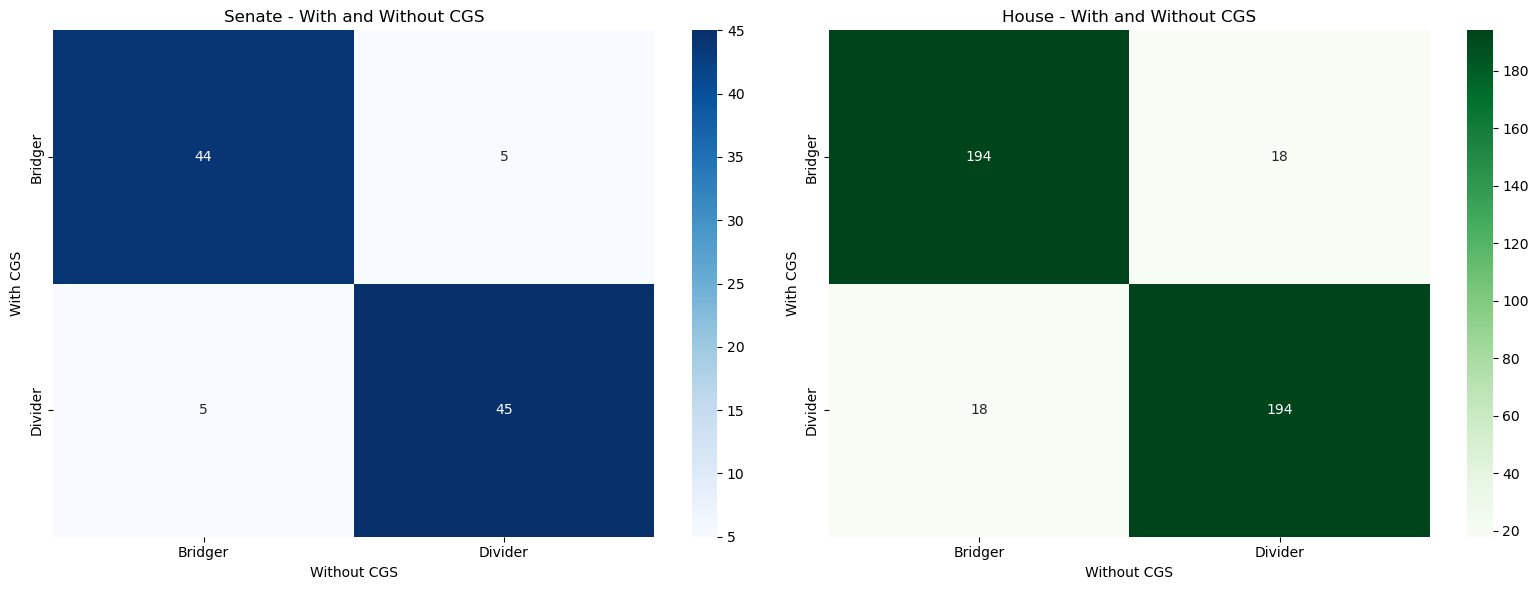

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
labels_senate = sorted(set(new_grade_senate['Category']).union(set(senate['category'])))
matrix_senate = confusion_matrix(new_grade_senate['Category'], senate['category'], labels=labels_senate)
labels_house = sorted(set(new_grade_house['Category']).union(set(house['category'])))
matrix_house = confusion_matrix(new_grade_house['Category'], house['category'], labels=labels_house)

# Convert confusion matrix to DataFrame for better plotting
confusion_senate = pd.DataFrame(matrix_senate, index=labels_senate, columns=labels_senate)
confusion_house = pd.DataFrame(matrix_house, index=labels_house, columns=labels_house)

# Correctly reference ax1 and ax2 instead of axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First heatmap
sns.heatmap(confusion_senate, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=labels_senate, yticklabels=labels_senate, ax=ax1)
ax1.set_title("Senate - With and Without CGS")
ax1.set_xlabel("Without CGS")
ax1.set_ylabel("With CGS")

# Second heatmap
sns.heatmap(confusion_house, annot=True, fmt="d", cmap="Greens", cbar=True,
            xticklabels=labels_house, yticklabels=labels_house, ax=ax2)
ax2.set_title("House - With and Without CGS")
ax2.set_xlabel("Without CGS")
ax2.set_ylabel("With CGS")

plt.tight_layout()
plt.show()

We can also compare the scores themselves to see how they compare. These scatterplots show the old score compared to the new score. A perfectly linear relationship would imply no change between them. This shows that the relationship is pretty linear with an R^2 of 0.88 but not perfectly linear.

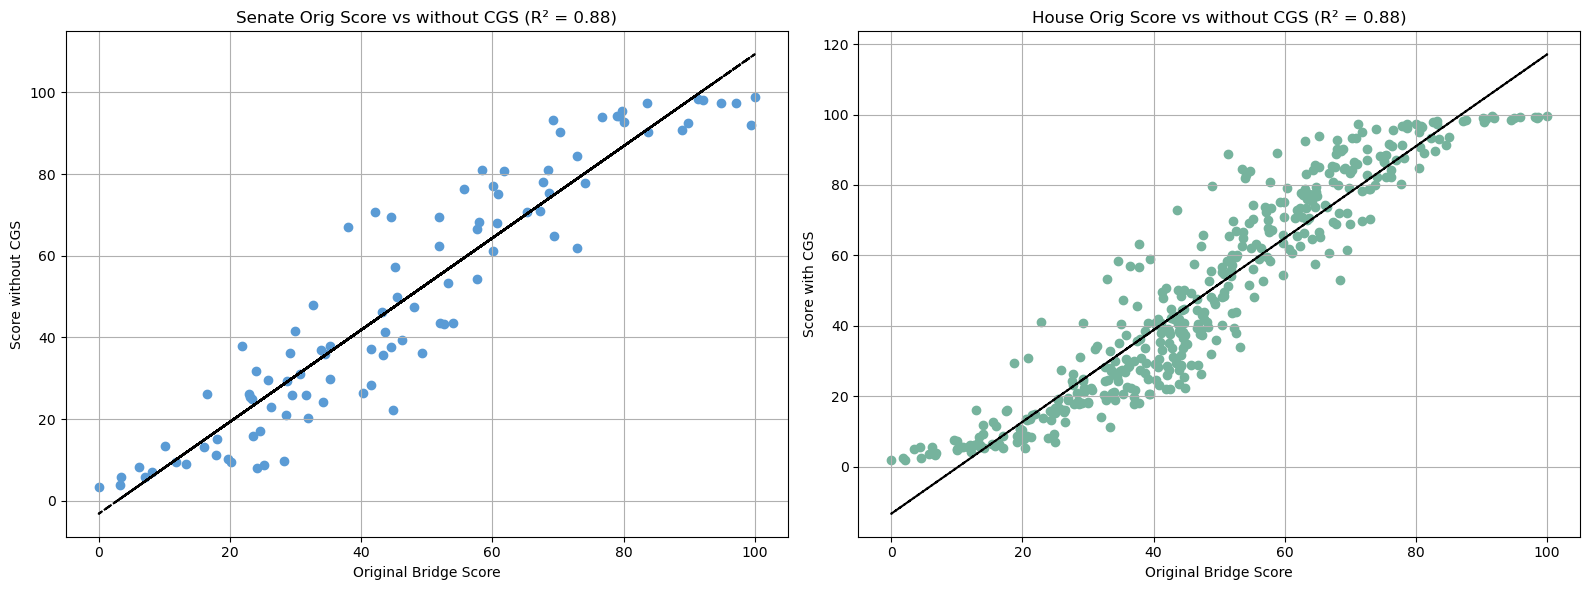

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_senate = new_grade_senate['Bridge Score'].values.reshape(-1, 1)
y_senate = senate['normdisn_s'].values
x_house = new_grade_house['Bridge Score'].values.reshape(-1, 1)
y_house = house['normdisn_s'].values

# Fit linear regression for each plot
model_senate = LinearRegression().fit(x_senate, y_senate)
r2_senate = r2_score(y_senate, model_senate.predict(x_senate))

model_house = LinearRegression().fit(x_house, y_house)
r2_house = r2_score(y_house, model_house.predict(x_house))

# Plotting
plt.figure(figsize=(16, 6))

# First scatter plot (Senate)
plt.subplot(1, 2, 1)
plt.scatter(x_senate, y_senate, color="#5A9BD5")
plt.plot(x_senate, model_senate.predict(x_senate), color='black', linestyle='--')  # Regression line
plt.title(f'Senate Orig Score vs without CGS (R² = {r2_senate:.2f})')
plt.xlabel('Original Bridge Score')
plt.ylabel('Score without CGS')
plt.grid()

# Second scatter plot (House)
plt.subplot(1, 2, 2)
plt.scatter(x_house, y_house, color="#76B39D")
plt.plot(x_house, model_house.predict(x_house), color='black', linestyle='--')  # Regression line
plt.title(f'House Orig Score vs without CGS (R² = {r2_house:.2f})')
plt.xlabel('Original Bridge Score')
plt.ylabel('Score with CGS')
plt.grid()

plt.tight_layout()
plt.show()

Finally, we can see how the distributions of the scores have changed.

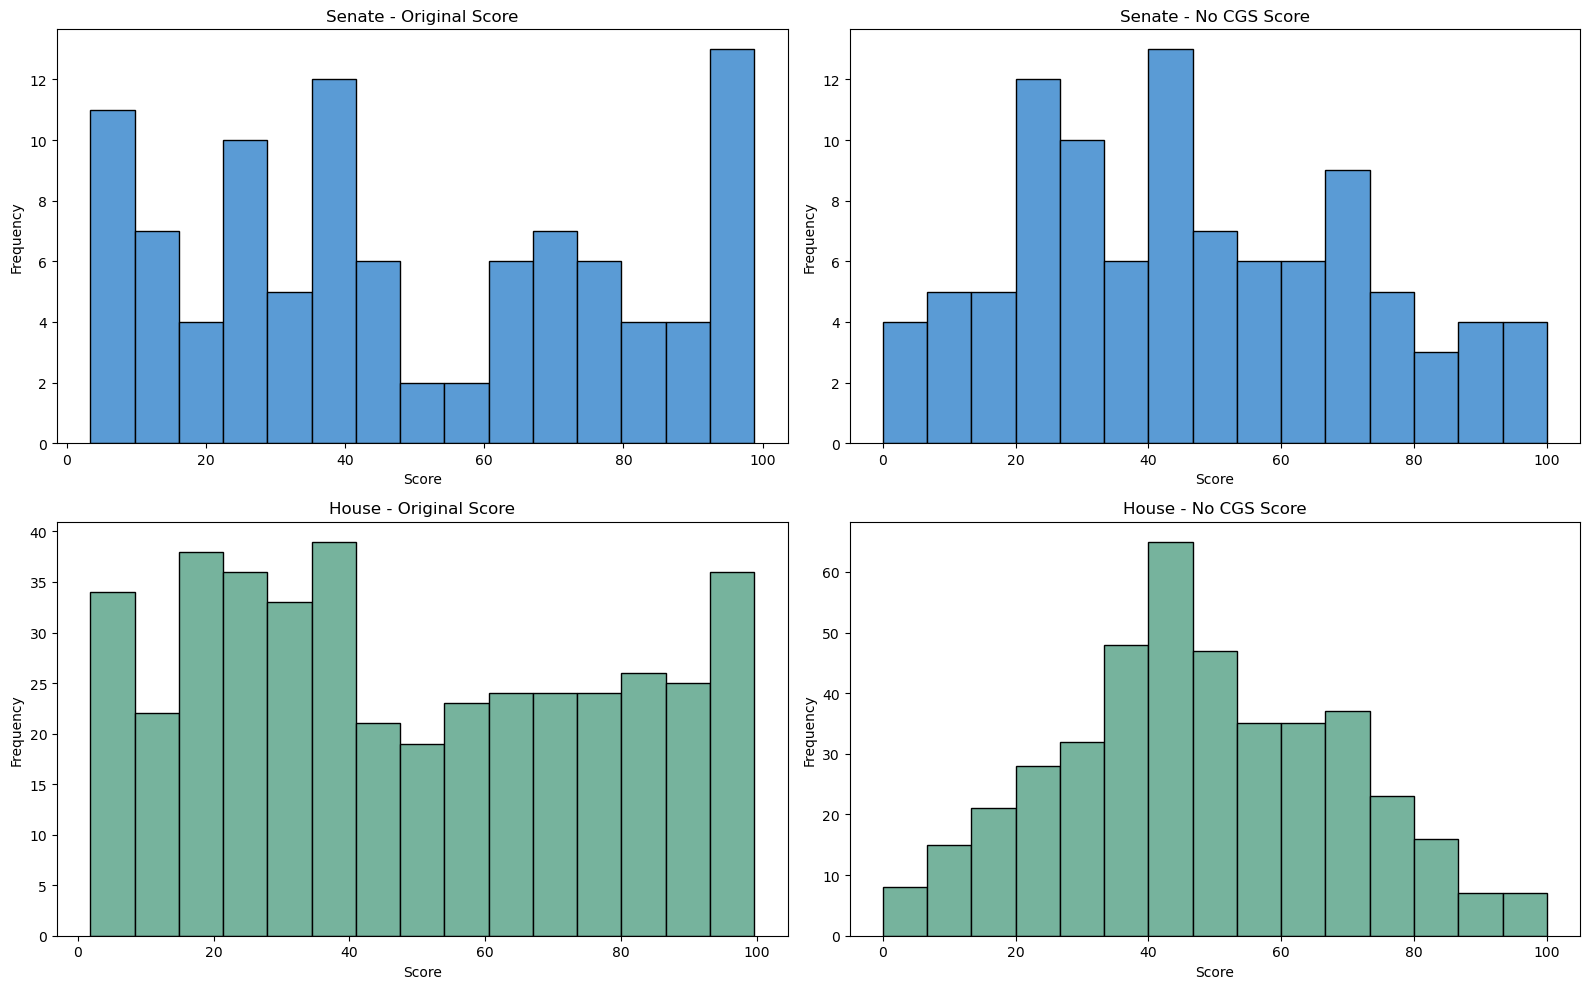

In [51]:
plt.figure(figsize=(16, 10))

# Histogram for Senate Original Score
plt.subplot(2, 2, 1)
plt.hist(senate['normdisn_s'], bins=15, color="#5A9BD5", edgecolor='black')
plt.title('Senate - Original Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for Senate New Standardized Score
plt.subplot(2, 2, 2)
plt.hist(new_grade_senate['Bridge Score'], bins=15, color="#5A9BD5", edgecolor='black')
plt.title('Senate - No CGS Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for House Original Score
plt.subplot(2, 2, 3)
plt.hist(house['normdisn_s'], bins=15, color="#76B39D", edgecolor='black')
plt.title('House - Original Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for House New Standardized Score
plt.subplot(2, 2, 4)
plt.hist(new_grade_house['Bridge Score'], bins=15, color="#76B39D", edgecolor='black')
plt.title('House - No CGS Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Let's look at what happens when we incorporate the caucus and senate group membership data, remembering to scale the data before merging with the other metrics

In [52]:
# Read the Caucus CSV file into a DataFrame
senate_membership = pd.read_csv("118th_Senate_Groups.csv")
house_membership = pd.read_csv("118th_House_Caucus.csv")

In [53]:
senate

,bioguide_id,first name,last name,full name,party name,party letter,district,state,status,race (cpi),...,adj_score_S,normdisn_s,category,Bridge Grade,VV_ideology,PRL_ideology,concat,vv_ideology-ND,PRL ideology-ND,ideology_disn
0,M001153,Lisa,Murkowski,Lisa Murkowski,Republican,R,AK,Alaska,not up for election,NaN,...,587.209698,76.264030,Bridger,B,0.208,0.487516,Lisa Murkowski (R) - AK,59.378713,54.231758,13.610471
1,S001198,Dan,Sullivan,Dan Sullivan,Republican,R,AK,Alaska,not up for election,NaN,...,437.816416,43.584725,Bridger,B,0.493,1.937050,Dan Sullivan (R) - AK,79.836415,82.602852,62.439267
2,B001319,Katie Boyd,Britt,Katie Boyd Britt,Republican,R,AL,Alabama,not up for election,NaN,...,334.489756,22.135898,Divider,C,0.571,2.248260,Katie Boyd Britt (R) - AL,84.124574,86.806299,70.930873
3,T000278,Tommy,Tuberville,Tommy Tuberville,Republican,R,AL,Alabama,not up for election,NaN,...,152.775565,3.336181,Divider,F,0.936,2.561410,Tommy Tuberville (R) - AL,96.130912,90.269990,86.400901
4,B001236,John,Boozman,John Boozman,Republican,R,AR,Arkansas,not up for election,NaN,...,558.426263,70.746026,Bridger,B,0.427,1.795490,John Boozman (R) - AR,75.715920,80.436154,56.152074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,J000293,Ron,Johnson,Ron Johnson,Republican,R,WI,Wisconsin,not up for election,NaN,...,199.262170,5.928019,Divider,F,0.642,2.446210,Ron Johnson (R) - WI,87.465799,89.082790,76.548590
95,M001183,Joe III,Manchin,Joe III Manchin,Independent,I,WV,West Virginia,retiring,NaN,...,796.242641,97.387028,Bridger,A,-0.057,0.045862,Joe III Manchin (I) - WV,37.478853,44.143953,-18.377194
96,C001047,Shelley Moore,Capito,Shelley Moore Capito,Republican,R,WV,West Virginia,not up for election,NaN,...,754.601910,95.512609,Bridger,A,0.281,1.421990,Shelley Moore Capito (R) - WV,65.195223,73.983694,39.178917
97,B001261,John,Barrasso,John Barrasso,Republican,R,WY,Wyoming,running,Solid R,...,355.990125,26.060143,Divider,C,0.538,2.100870,John Barrasso (R) - WY,82.388992,84.911639,67.300632


In [54]:
senate_membership

,bioguide_id,Name,Common Sense Coalition,caucus_sum
0,C001035,Susan Collins,1,1
1,C001047,Shelley Moore Capito,1,1
2,C001075,Bill Cassidy,1,1
3,C001088,Chris Coons,1,1
4,D000563,Dick Durbin,1,1
5,G000359,Lindsey Graham,1,1
6,H001076,Maggie Hassan,1,1
7,H000273,John Hickenlooper,1,1
8,K000384,Tim Kaine,1,1
9,K000377,Mark Kelly,1,1


In [55]:
# Merge senate with senate_membership
senate = senate.merge(
    senate_membership[['bioguide_id', 'caucus_sum']],
    on='bioguide_id',
    how='left'
).rename(columns={'caucus_sum': 'membership'})

# Replace NaN with 0 in the membership column
senate['membership'] = senate['membership'].fillna(0)

# Merge house with house_membership
house = house.merge(
    house_membership[['bioguide_id', 'caucus_sum']],
    on='bioguide_id',
    how='left'
).rename(columns={'caucus_sum': 'membership'})

# Replace NaN with 0 in the membership column
house['membership'] = house['membership'].fillna(0)

# Standardize membership values to a scale of 0-100
scaler = MinMaxScaler(feature_range=(0, 100))

# Apply scaler to Senate and convert to 1D array
senate['membership'] = scaler.fit_transform(senate[['membership']]).ravel()

# Apply scaler to House and convert to 1D array
house['membership'] = scaler.fit_transform(house[['membership']]).ravel()

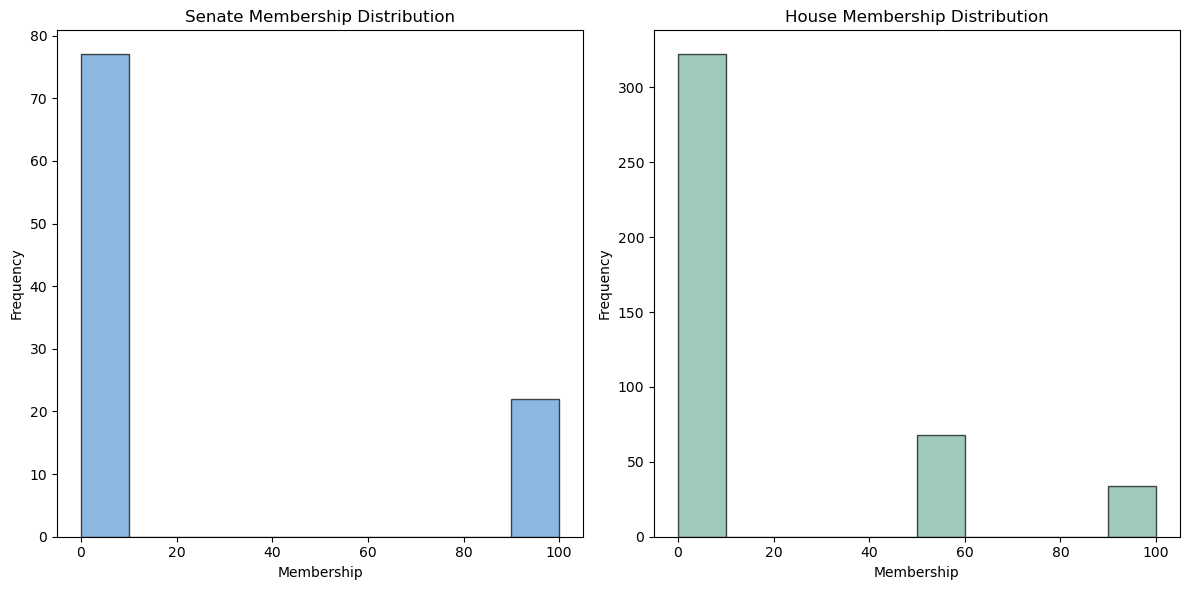

In [56]:
# Create histograms for the "membership" field in senate and house DataFrames
plt.figure(figsize=(12, 6))

# Senate membership histogram
plt.subplot(1, 2, 1)
plt.hist(senate['membership'], bins=10, color="#5A9BD5", edgecolor='black', alpha=0.7)
plt.title('Senate Membership Distribution')
plt.xlabel('Membership')
plt.ylabel('Frequency')

# House membership histogram
plt.subplot(1, 2, 2)
plt.hist(house['membership'], bins=10, color="#76B39D", edgecolor='black', alpha=0.7)
plt.title('House Membership Distribution')
plt.xlabel('Membership')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As we can see here the majority of members of cogress are not in one of these groups. We can create a new grade based on this membership based on getting the 25 points assigned to Common Ground Personal Action in the past

In [57]:
columns_w_membership = ["normdisn_A", "normdisn_B", "normdisn_D", "normdisn_E", 
           "normdisn_F1", "normdisn_F2", "normdisn_G", "normdisn_H", 
           "normdisn_I1", "normdisn_I2", "normdisn_K", "normdisn_L", 
           "multiple_M", "multple_N", "multiple_O", 'match', 'membership']

senate_scores_w_membership = senate[columns_w_membership]
house_scores_w_membership = house[columns_w_membership]

In [58]:
print("Columns expected:", columns_w_membership)
print("Columns in scores DataFrame:", house_scores_w_membership.columns.tolist())

Columns expected: ['normdisn_A', 'normdisn_B', 'normdisn_D', 'normdisn_E', 'normdisn_F1', 'normdisn_F2', 'normdisn_G', 'normdisn_H', 'normdisn_I1', 'normdisn_I2', 'normdisn_K', 'normdisn_L', 'multiple_M', 'multple_N', 'multiple_O', 'match', 'membership']
Columns in scores DataFrame: ['normdisn_A', 'normdisn_B', 'normdisn_D', 'normdisn_E', 'normdisn_F1', 'normdisn_F2', 'normdisn_G', 'normdisn_H', 'normdisn_I1', 'normdisn_I2', 'normdisn_K', 'normdisn_L', 'multiple_M', 'multple_N', 'multiple_O', 'match', 'membership']


Here is an adjusted function for score calculation based on giving 25 points to membership count

In [59]:
def calculate_score_w_membership(scores
):

    A, B, D, E, F1, F2, G, H, I1, I2, K, L, M, N, O, match, membership = [scores[col] for col in columns_w_membership]

    calculated_score = (
        round((A * 150), 2) +
        # round((B * 50), 2) +
        round((D * 150), 2) + 
        round((E * 100), 2) + 
        round((F1 * 150), 2) + 
        round((F2 * 100), 2) + 
        # round((G * 50), 2) +
        # round((H * 50), 2) + 
        round((I1 * 100), 2) + 
        round(((100 - I2) * 100), 2) + 
        # round((K * 50), 2) + 
        round((L * 75), 2) +
        round((membership * 25), 2)
)
    multiple = (100+((match*M)+N+O))/100
    return round(calculated_score/100 * multiple, 2)

Now we go throught the same procedure as above of calculating the new score and standardizing them

In [60]:
# Scale the data
scaled_senate_w_membership = scaler.fit_transform(calculate_score_w_membership(senate_scores_w_membership).values.reshape(-1, 1))
scaled_house_w_membership = scaler.fit_transform(calculate_score_w_membership(house_scores_w_membership).values.reshape(-1, 1))

# Convert back to Pandas Series
senate_scores_w_membership = pd.Series(scaled_senate_w_membership.flatten(), index=senate_scores_w_membership.index)
house_scores_w_membership = pd.Series(scaled_house_w_membership.flatten(), index=house_scores_w_membership.index)

We can assign grades to our new scores the same way as before

In [61]:
new_grade_senate_w_membership = bridge_grading(senate_scores_w_membership)
new_grade_house_w_membership = bridge_grading(house_scores_w_membership)

We can compare them to the originals like we did before

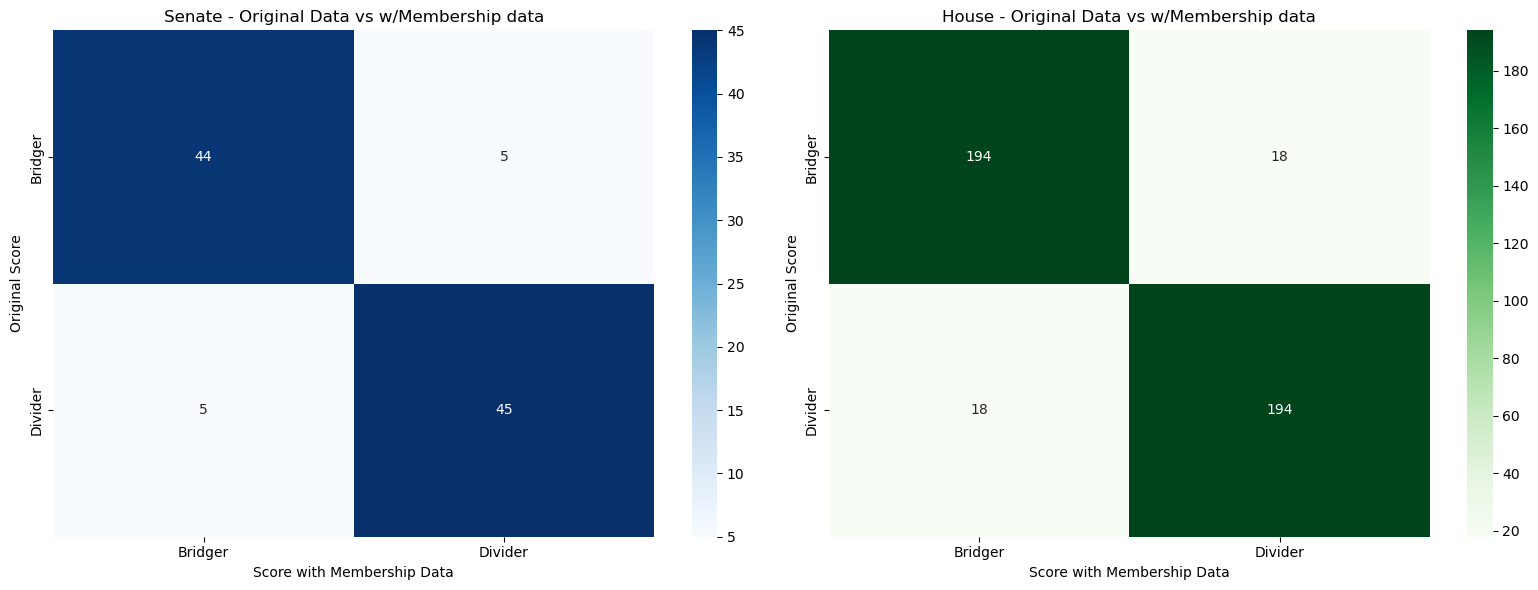

In [62]:
# Compute confusion matrix
labels_senate = sorted(set(new_grade_senate_w_membership['Category']).union(set(senate['category'])))
matrix_senate = confusion_matrix(new_grade_senate_w_membership['Category'], senate['category'], labels=labels_senate)
labels_house = sorted(set(new_grade_house_w_membership['Category']).union(set(house['category'])))
matrix_house = confusion_matrix(new_grade_house_w_membership['Category'], house['category'], labels=labels_house)

# Convert confusion matrix to DataFrame for better plotting
confusion_senate = pd.DataFrame(matrix_senate, index=labels_senate, columns=labels_senate)
confusion_house = pd.DataFrame(matrix_house, index=labels_house, columns=labels_house)

# Correctly reference ax1 and ax2 instead of axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First heatmap
sns.heatmap(confusion_senate, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=labels_senate, yticklabels=labels_senate, ax=ax1)
ax1.set_title("Senate - Original Data vs w/Membership data")
ax1.set_xlabel("Score with Membership Data")
ax1.set_ylabel("Original Score")

# Second heatmap
sns.heatmap(confusion_house, annot=True, fmt="d", cmap="Greens", cbar=True,
            xticklabels=labels_house, yticklabels=labels_house, ax=ax2)
ax2.set_title("House - Original Data vs w/Membership data")
ax2.set_xlabel("Score with Membership Data")
ax2.set_ylabel("Original Score")

plt.tight_layout()
plt.show()

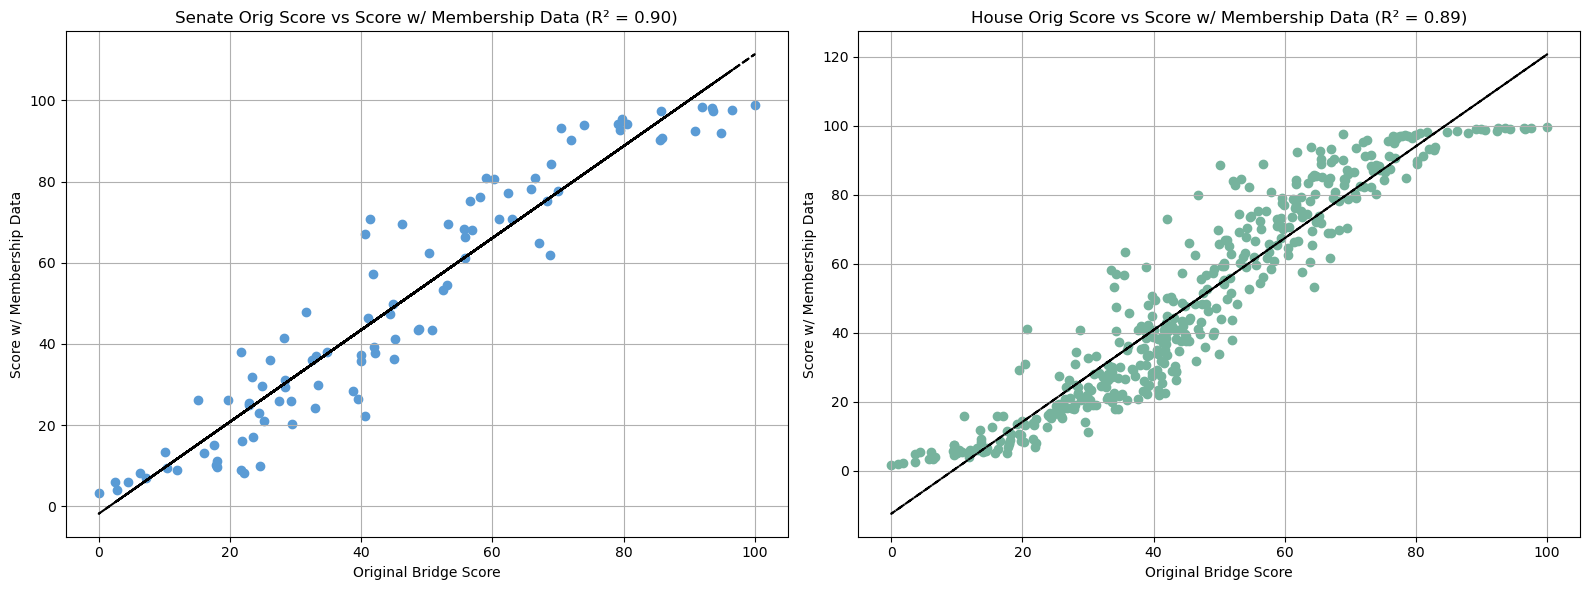

In [65]:
x_senate = new_grade_senate_w_membership['Bridge Score'].values.reshape(-1, 1)
y_senate = senate['normdisn_s'].values
x_house = new_grade_house_w_membership['Bridge Score'].values.reshape(-1, 1)
y_house = house['normdisn_s'].values

# Fit linear regression for each plot
model_senate = LinearRegression().fit(x_senate, y_senate)
r2_senate = r2_score(y_senate, model_senate.predict(x_senate))

model_house = LinearRegression().fit(x_house, y_house)
r2_house = r2_score(y_house, model_house.predict(x_house))

# Plotting
plt.figure(figsize=(16, 6))

# First scatter plot (Senate)
plt.subplot(1, 2, 1)
plt.scatter(x_senate, y_senate, color="#5A9BD5")
plt.plot(x_senate, model_senate.predict(x_senate), color='black', linestyle='--')  # Regression line
plt.title(f'Senate Orig Score vs Score w/ Membership Data (R² = {r2_senate:.2f})')
plt.xlabel('Original Bridge Score')
plt.ylabel('Score w/ Membership Data')
plt.grid()

# Second scatter plot (House)
plt.subplot(1, 2, 2)
plt.scatter(x_house, y_house, color="#76B39D")
plt.plot(x_house, model_house.predict(x_house), color='black', linestyle='--')  # Regression line
plt.title(f'House Orig Score vs Score w/ Membership Data (R² = {r2_house:.2f})')
plt.xlabel('Original Bridge Score')
plt.ylabel('Score w/ Membership Data')
plt.grid()

plt.tight_layout()
plt.show()